## Initial

In [1]:
import pandas as pd
import pd_explain
import numpy as np

usetex-False


In [2]:
bank_all = (pd.read_csv(r"..\..\Datasets\bank_churners_user_study.csv"))

In [3]:
bank_all.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Registered_Products_Count,Months_Inactive_Count_Last_Year,Contacts_Count_Last_Year,Credit_Limit,Credit_Used,Credit_Open_To_Buy,Total_Amount_Change_Q4_vs_Q1,Total_Transitions_Amount,Total_Transitions_Count,Total_Count_Change_Q4_vs_Q1,Credit_Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## example 1

In [4]:
by_category = bank_all.groupby(['Income_Category'])['CLIENTNUM'].count()

<Axes: xlabel='Income_Category'>

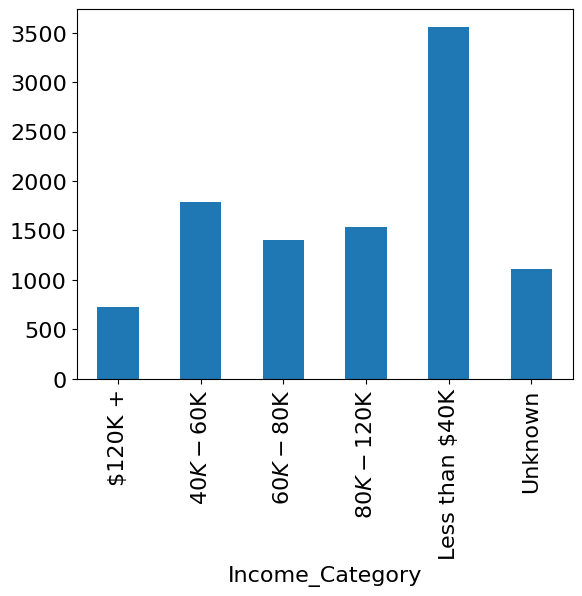

In [5]:
by_category.plot(kind='bar')

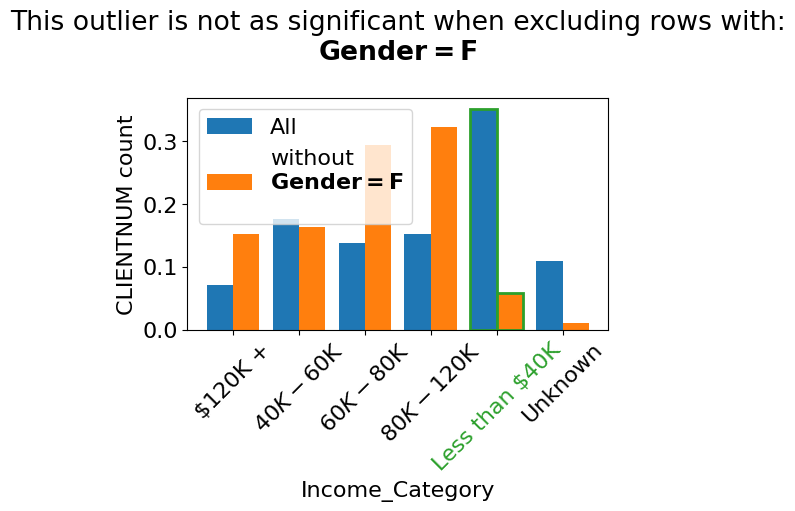

In [6]:
# ['Less than $40K']
by_category.explain(target='Less than $40K', explainer='outlier', dir='high')

In [7]:
females = bank_all[bank_all['Gender'] == 'F']
females['Income_Category'].value_counts()

Income_Category
Less than $40K    3284
Unknown           1060
$40K - $60K       1014
Name: count, dtype: int64

In [8]:
females_by_category = females.groupby(['Income_Category'])['CLIENTNUM'].count()

<Axes: xlabel='Income_Category'>

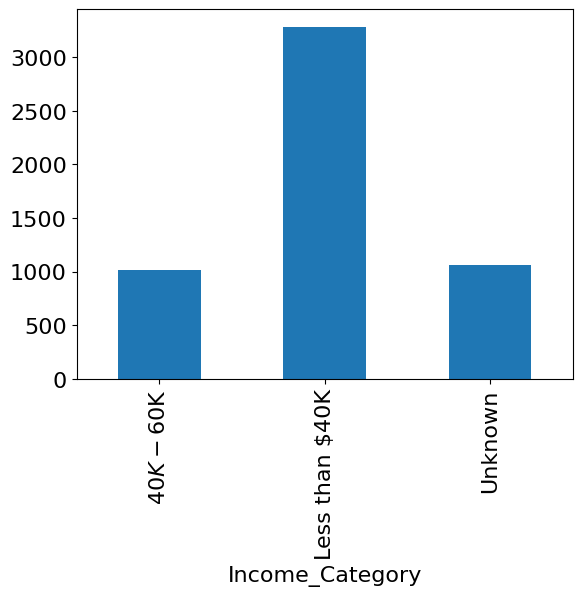

In [9]:
females_by_category.plot(kind='bar')

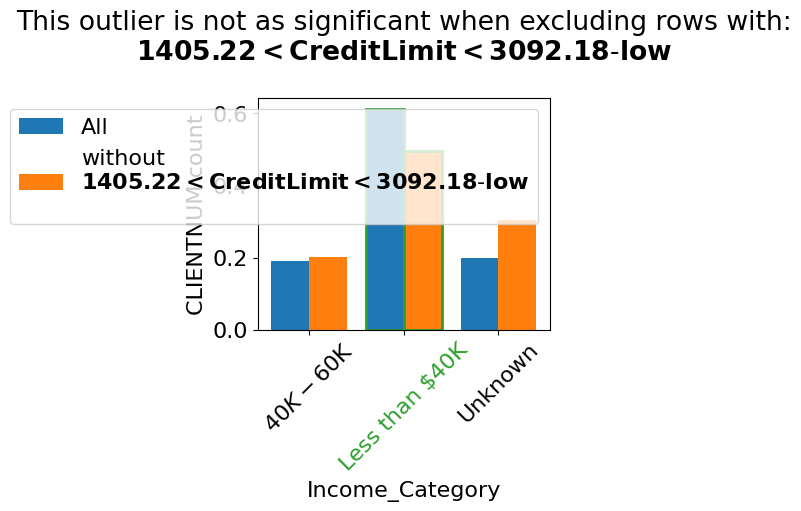

In [10]:
females_by_category.explain(target='Less than $40K', explainer='outlier', dir="high")

## example 2

In [11]:
bank_all['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [12]:
younger = bank_all[bank_all['Customer_Age'] <= 60]

In [13]:
limit_by_age = younger.groupby(['Customer_Age']).Credit_Limit.mean()

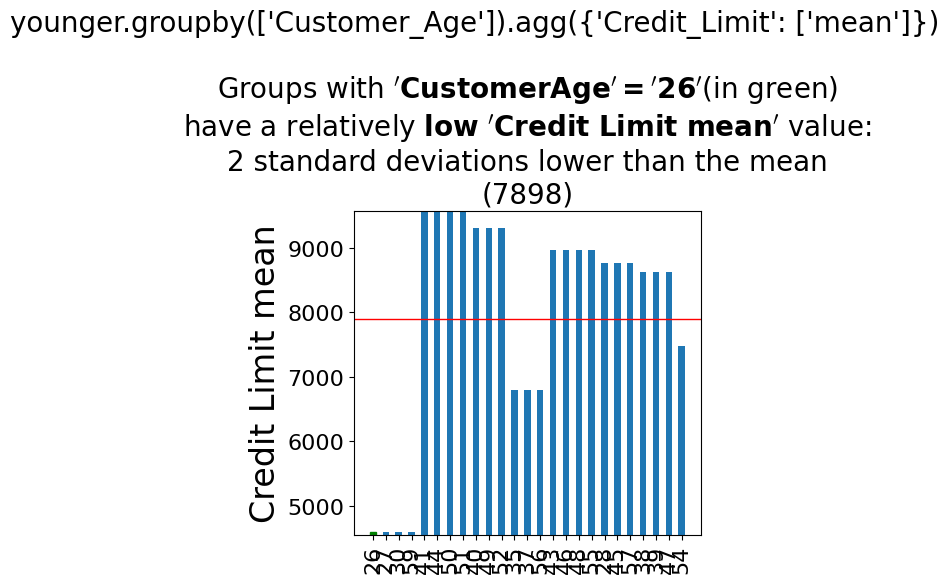

In [14]:
limit_by_age.explain(use_sampling=True, sample_size=0.7)

In [15]:
bank_all['Months_Inactive_Count_Last_Year'].value_counts()

Months_Inactive_Count_Last_Year
3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: count, dtype: int64

In [16]:
limit_by_age.explain(explainer='outlier', target=26, dir="low")

'There was no explanation.'